# Community and Crime
This work is a submit for an assignment of the course MIE1628 in the University of Toronto. It is based on a dataset **Communities and Crime** from UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/183/communities+and+crime

Overview of the work:
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Model Training
- Data Analysis
- Summary

Ref: Redmond, M. (2002). Communities and Crime [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C53W3X.

### Problem Definition
Understanding and predicting violent crime rates in communities is a critical concern for everyone living in the community. Crime not only causes fear among residents but also poses barriers to socio-economic development. Addressing this issue requires a data-driven approach not only to predict violent crime cases with numerous socio-economic factors, but also to identify some key factors that contribute to violent crime.

This project aims to analyze the "Communities and Crime" dataset from the UCI Machine Learning Repository, which integrates data from the 1990 US Census, the 1990 US Law Enforcement Management and Administrative Statistics (LEMAS) survey, and the 1995 FBI Uniform Crime Reporting (UCR) Program. The objective is to develop a predictive model that estimates the violent crime cases per 100,000 population in various U.S. communities based on a range of explanatory variables, including demographics, economic indicators, educational attainment, and law enforcement resources.

By uncovering patterns within this dataset, the project seeks to provide actionable insights into the primary drivers of violent crime, thereby informing strategies for crime prevention and resource allocation.

### Project Roadmap
Following steps are designed for this project:

1. Data Preprocessing

    Feature Understanding: The dataset includes 127 attributes and 1994 instances. Thefeature includes community characteristics (e.g., median family income, percent urban population) and law enforcement data (e.g., per capita number of police officers).

    Target Variable Definition: The target variable is the per capita violent crimes, calculated using the population and the sum of crime variables considered violent crimes in the US: murder, rape, robbery, and assault.

    Handling Missing Values: Identify attributes with missing data. The dataset includes missing values, particularly in law enforcement data, due to the LEMAS survey's focus on larger police departments and a random sample of smaller ones. Develop strategies to address these gaps, such as imputation or exclusion, based on the extent of missing.

    Dropping Unrelated Columns: Remove attributes that are non-predictive or unrelated to the target.

    Normalization: The dataset's numeric data has been normalized to the range [0,1]. Verify the normalization process and consider re-normalizing if necessary to ensure consistency across features.

2. Data Cleaning

    Addressing Missing Data: For attributes with substantial missing data, assess the impact on analysis. If necessary, apply imputation or remove attributes with missing values.

3. Exploratory Data Analysis (EDA)

    Descriptive Statistics: Compute summary statistics to understand the distribution of each attribute.

    Visualization: Create visualizations such as histograms, box plots, and scatter plots to explore distributions and relationships between variables.

    Correlation Analysis: Examine correlations between independent variables and the target variable to identify potential predictors and detect multicollinearity.

    Factors Ranking: Rank important factors influencing the target variable.

4. Modeling Approach
    Model Selection: Explore various explanative regression models to predict violent crime cases, including:
    - Linear Regression: Creating a baseline performance.
    - Regularized Regression (Ridge and Lasso): Address multicollinearity and perform feature selection.
    - Decision Tree-Based Models (Random Forest, XGBoost): Introduce non-linearity for the best performance and tree models for feature importance analysis.

    Model Evaluation: Employ cross-validation techniques to evaluate model   performance using metrics such as Root Mean Squared Error (RMSE). 
    
    Feature Importance Analysis: Analyze the importance of each feature in the predictive models to identify key factors influencing violent crime cases.

## Read data

In [326]:
import pandas as pd
import pyspark

# Based on the order given in the .names or .arff section
c_names = [
    'state', 'county', 'community', 'communityname', 'fold',
    'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
    'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc',
    'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
    'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
    'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
    'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
    'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
    'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
    'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
    'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
    'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly',
    'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
    'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
    'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
    'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb',
    'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
    'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars',
    'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
    'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

In [327]:
df_pd = pd.read_csv("./communities.data.csv", names=c_names)

In [328]:
df_pd.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [329]:
len(df_pd)

1994

## Data Preprocessing
### Feature Understanding
The dataset includes 127 attributes and 1994 instances. The feature includes community characteristics (e.g., median family income, percent urban population) and law enforcement data (e.g., per capita number of police officers). 

According to descriptions for each column, we can seperate all columns into different groups.

In [140]:
feat2desc = {
    "state": "US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)",
    "county": "numeric code for county - not predictive, and many missing values (numeric)",
    "community": "numeric code for community - not predictive and many missing values (numeric)",
    "communityname": "community name - not predictive - for information only (string)",
    "fold": "fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)",
    "population": "population for community (numeric - decimal)",
    "householdsize": "mean people per household (numeric - decimal)",
    "racepctblack": "percentage of population that is african american (numeric - decimal)",
    "racePctWhite": "percentage of population that is caucasian (numeric - decimal)",
    "racePctAsian": "percentage of population that is of asian heritage (numeric - decimal)",
    "racePctHisp": "percentage of population that is of hispanic heritage (numeric - decimal)",
    "agePct12t21": "percentage of population that is 12-21 in age (numeric - decimal)",
    "agePct12t29": "percentage of population that is 12-29 in age (numeric - decimal)",
    "agePct16t24": "percentage of population that is 16-24 in age (numeric - decimal)",
    "agePct65up": "percentage of population that is 65 and over in age (numeric - decimal)",
    "numbUrban": "number of people living in areas classified as urban (numeric - decimal)",
    "pctUrban": "percentage of people living in areas classified as urban (numeric - decimal)",
    "medIncome": "median household income (numeric - decimal)",
    "pctWWage": "percentage of households with wage or salary income in 1989 (numeric - decimal)",
    "pctWFarmSelf": "percentage of households with farm or self employment income in 1989 (numeric - decimal)",
    "pctWInvInc": "percentage of households with investment / rent income in 1989 (numeric - decimal)",
    "pctWSocSec": "percentage of households with social security income in 1989 (numeric - decimal)",
    "pctWPubAsst": "percentage of households with public assistance income in 1989 (numeric - decimal)",
    "pctWRetire": "percentage of households with retirement income in 1989 (numeric - decimal)",
    "medFamInc": "median family income (differs from household income for non-family households) (numeric - decimal)",
    "perCapInc": "per capita income (numeric - decimal)",
    "whitePerCap": "per capita income for caucasians (numeric - decimal)",
    "blackPerCap": "per capita income for african americans (numeric - decimal)",
    "indianPerCap": "per capita income for native americans (numeric - decimal)",
    "AsianPerCap": "per capita income for people with asian heritage (numeric - decimal)",
    "OtherPerCap": "per capita income for people with 'other' heritage (numeric - decimal)",
    "HispPerCap": "per capita income for people with hispanic heritage (numeric - decimal)",
    "NumUnderPov": "number of people under the poverty level (numeric - decimal)",
    "PctPopUnderPov": "percentage of people under the poverty level (numeric - decimal)",
    "PctLess9thGrade": "percentage of people 25 and over with less than a 9th grade education (numeric - decimal)",
    "PctNotHSGrad": "percentage of people 25 and over that are not high school graduates (numeric - decimal)",
    "PctBSorMore": "percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)",
    "PctUnemployed": "percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)",
    "PctEmploy": "percentage of people 16 and over who are employed (numeric - decimal)",
    "PctEmplManu": "percentage of people 16 and over who are employed in manufacturing (numeric - decimal)",
    "PctEmplProfServ": "percentage of people 16 and over who are employed in professional services (numeric - decimal)",
    "PctOccupManu": "percentage of people 16 and over who are employed in manufacturing (numeric - decimal) ########",
    "PctOccupMgmtProf": "percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal)",
    "MalePctDivorce": "percentage of males who are divorced (numeric - decimal)",
    "MalePctNevMarr": "percentage of males who have never married (numeric - decimal)",
    "FemalePctDiv": "percentage of females who are divorced (numeric - decimal)",
    "TotalPctDiv": "percentage of population who are divorced (numeric - decimal)",
    "PersPerFam": "mean number of people per family (numeric - decimal)",
    "PctFam2Par": "percentage of families (with kids) that are headed by two parents (numeric - decimal)",
    "PctKids2Par": "percentage of kids in family housing with two parents (numeric - decimal)",
    "PctYoungKids2Par": "percent of kids 4 and under in two parent households (numeric - decimal)",
    "PctTeen2Par": "percent of kids age 12-17 in two parent households (numeric - decimal)",
    "PctWorkMomYoungKids": "percentage of moms of kids 6 and under in labor force (numeric - decimal)",
    "PctWorkMom": "percentage of moms of kids under 18 in labor force (numeric - decimal)",
    "NumIlleg": "number of kids born to never married (numeric - decimal)",
    "PctIlleg": "percentage of kids born to never married (numeric - decimal)",
    "NumImmig": "total number of people known to be foreign born (numeric - decimal)",
    "PctImmigRecent": "percentage of _immigrants_ who immigated within last 3 years (numeric - decimal)",
    "PctImmigRec5": "percentage of _immigrants_ who immigated within last 5 years (numeric - decimal)",
    "PctImmigRec8": "percentage of _immigrants_ who immigated within last 8 years (numeric - decimal)",
    "PctImmigRec10": "percentage of _immigrants_ who immigated within last 10 years (numeric - decimal)",
    "PctRecentImmig": "percent of _population_ who have immigrated within the last 3 years (numeric - decimal)",
    "PctRecImmig5": "percent of _population_ who have immigrated within the last 5 years (numeric - decimal)",
    "PctRecImmig8": "percent of _population_ who have immigrated within the last 8 years (numeric - decimal)",
    "PctRecImmig10": "percent of _population_ who have immigrated within the last 10 years (numeric - decimal)",
    "PctSpeakEnglOnly": "percent of people who speak only English (numeric - decimal)",
    "PctNotSpeakEnglWell": "percent of people who do not speak English well (numeric - decimal)",
    "PctLargHouseFam": "percent of family households that are large (6 or more) (numeric - decimal)",
    "PctLargHouseOccup": "percent of all occupied households that are large (6 or more people) (numeric - decimal)",
    "PersPerOccupHous": "mean persons per household (numeric - decimal)",
    "PersPerOwnOccHous": "mean persons per owner occupied household (numeric - decimal)",
    "PersPerRentOccHous": "mean persons per rental household (numeric - decimal)",
    "PctPersOwnOccup": "percent of people in owner occupied households (numeric - decimal)",
    "PctPersDenseHous": "percent of persons in dense housing (more than 1 person per room) (numeric - decimal)",
    "PctHousLess3BR": "percent of housing units with less than 3 bedrooms (numeric - decimal)",
    "MedNumBR": "median number of bedrooms (numeric - decimal)",
    "HousVacant": "number of vacant households (numeric - decimal)",
    "PctHousOccup": "percent of housing occupied (numeric - decimal)",
    "PctHousOwnOcc": "percent of households owner occupied (numeric - decimal)",
    "PctVacantBoarded": "percent of vacant housing that is boarded up (numeric - decimal)",
    "PctVacMore6Mos": "percent of vacant housing that has been vacant more than 6 months (numeric - decimal)",
    "MedYrHousBuilt": "median year housing units built (numeric - decimal)",
    "PctHousNoPhone": "percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal)",
    "PctWOFullPlumb": "percent of housing without complete plumbing facilities (numeric - decimal)",
    "OwnOccLowQuart": "owner occupied housing - lower quartile value (numeric - decimal)",
    "OwnOccMedVal": "owner occupied housing - median value (numeric - decimal)",
    "OwnOccHiQuart": "owner occupied housing - upper quartile value (numeric - decimal)",
    "RentLowQ": "rental housing - lower quartile rent (numeric - decimal)",
    "RentMedian": "rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal)",
    "RentHighQ": "rental housing - upper quartile rent (numeric - decimal)",
    "MedRent": "median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal)",
    "MedRentPctHousInc": "median gross rent as a percentage of household income (numeric - decimal)",
    "MedOwnCostPctInc": "median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal)",
    "MedOwnCostPctIncNoMtg": "median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal)",
    "NumInShelters": "number of people in homeless shelters (numeric - decimal)",
    "NumStreet": "number of homeless people counted in the street (numeric - decimal)",
    "PctForeignBorn": "percent of people foreign born (numeric - decimal)",
    "PctBornSameState": "percent of people born in the same state as currently living (numeric - decimal)",
    "PctSameHouse85": "percent of people living in the same house as in 1985 (5 years before) (numeric - decimal)",
    "PctSameCity85": "percent of people living in the same city as in 1985 (5 years before) (numeric - decimal)",
    "PctSameState85": "percent of people living in the same state as in 1985 (5 years before) (numeric - decimal)",
    "LemasSwornFT": "number of sworn full time police officers (numeric - decimal)",
    "LemasSwFTPerPop": "sworn full time police officers per 100K population (numeric - decimal)",
    "LemasSwFTFieldOps": "number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal)",
    "LemasSwFTFieldPerPop": "sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal)",
    "LemasTotalReq": "total requests for police (numeric - decimal)",
    "LemasTotReqPerPop": "total requests for police per 100K popuation (numeric - decimal)",
    "PolicReqPerOffic": "total requests for police per police officer (numeric - decimal)",
    "PolicPerPop": "police officers per 100K population (numeric - decimal)",
    "RacialMatchCommPol": "a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal)",
    "PctPolicWhite": "percent of police that are caucasian (numeric - decimal)",
    "PctPolicBlack": "percent of police that are african american (numeric - decimal)",
    "PctPolicHisp": "percent of police that are hispanic (numeric - decimal)",
    "PctPolicAsian": "percent of police that are asian (numeric - decimal)",
    "PctPolicMinor": "percent of police that are minority of any kind (numeric - decimal)",
    "OfficAssgnDrugUnits": "number of officers assigned to special drug units (numeric - decimal)",
    "NumKindsDrugsSeiz": "number of different kinds of drugs seized (numeric - decimal)",
    "PolicAveOTWorked": "police average overtime worked (numeric - decimal)",
    "LandArea": "land area in square miles (numeric - decimal)",
    "PopDens": "population density in persons per square mile (numeric - decimal)",
    "PctUsePubTrans": "percent of people using public transit for commuting (numeric - decimal)",
    "PolicCars": "number of police cars (numeric - decimal)",
    "PolicOperBudg": "police operating budget (numeric - decimal)",
    "LemasPctPolicOnPatr": "percent of sworn full time police officers on patrol (numeric - decimal)",
    "LemasGangUnitDeploy": "gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time)",
    "LemasPctOfficDrugUn": "percent of officers assigned to drug units (numeric - decimal)",
    "PolicBudgPerPop": "police operating budget per population (numeric - decimal)",
    "ViolentCrimesPerPop": "total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)"
}

In [86]:
community_groups = [
    ["state", "county", "community", "communityname"]
]

unrelated_groups = [
    ["fold"]
]

demographics_groups = [
    ['population', 'householdsize'],
    ['PersPerFam', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous'],
    ['NumInShelters', 'NumStreet']
]

race_ethnicity_groups = [
    ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp'],
    ['whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap']
]

age_distribution_groups = [
    ['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up']
]

housing_groups = [
    ['numbUrban', 'pctUrban', 'PopDens', 'LandArea'],
    ['PctLargHouseFam', 'PctLargHouseOccup'],
    ['PctHousLess3BR', 'MedNumBR'],
    ['PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos'],
    ['MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb'],
    ['OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart'],
    ['RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent'],
    ['MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg'],
    ['PctPersOwnOccup', 'PctPersDenseHous']
]

income_economic_groups = [
    ['medIncome', 'medFamInc', 'perCapInc'],
    ['pctWWage', 'pctWFarmSelf', 'pctWInvInc'],
    ['pctWSocSec', 'pctWPubAsst', 'pctWRetire'],
    ['PctUnemployed', 'PctEmploy'],
    ['PctEmplManu', 'PctEmplProfServ'],
    ['PctOccupManu', 'PctOccupMgmtProf']
]

education_groups = [
    ['PctLess9thGrade', 'PctNotHSGrad'],
    ['PctBSorMore']
]

family_groups = [
    ['PctFam2Par', 'PctKids2Par'],
    ['PctYoungKids2Par', 'PctTeen2Par'],
    ['PctWorkMomYoungKids', 'PctWorkMom'],
    ['MalePctDivorce', 'MalePctNevMarr'],
    ['FemalePctDiv', 'TotalPctDiv'],
    ['NumIlleg', 'PctIlleg']
]

migration_language_groups = [
    ['NumImmig'],
    ['PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10'],
    ['PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10'],
    ['PctForeignBorn', 'PctBornSameState'],
    ['PctSpeakEnglOnly', 'PctNotSpeakEnglWell']
]

mobility_groups = [
    ['PctSameHouse85', 'PctSameCity85', 'PctSameState85']
]

law_enforcement_groups = [
    ['LemasSwornFT', 'LemasSwFTPerPop'],
    ['LemasSwFTFieldOps', 'LemasSwFTFieldPerPop'],
    ['LemasTotalReq', 'LemasTotReqPerPop'],
    ['PolicReqPerOffic', 'PolicPerPop'],
    ['PolicCars', 'PolicOperBudg', 'PolicBudgPerPop'],
    ['LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn'],
    ['OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked']
]

police_demographics_groups = [
    ['RacialMatchCommPol'],
    ['PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor']
]

target_group = [
    ['ViolentCrimesPerPop']
]



### Dropping Unrelated Columns
Remove the columns that are descriptive

In [330]:
unrelated_columns = community_groups[0] + unrelated_groups[0]
other_columns = list(df_pd.columns)
[other_columns.remove(c) for c in unrelated_columns]
df_desc = df_pd[unrelated_columns]
df_pd = df_pd[other_columns]

### Handling Missing Values
1. Find the columns with nan("?") values
2. Find the reason why they are missing
3. Decide to remove or fill them with specific values for training

In [331]:
df_pd = df_pd.replace("?", None)
df_backup = df_pd.copy(deep=True)

In [332]:
na_info = df_pd.isna().sum().to_dict()
print("Header  |  Number of missing Vals")
for k, v in na_info.items():
    if v > 0:
        print(k, "|", v)

Header  |  Number of missing Vals
OtherPerCap | 1
LemasSwornFT | 1675
LemasSwFTPerPop | 1675
LemasSwFTFieldOps | 1675
LemasSwFTFieldPerPop | 1675
LemasTotalReq | 1675
LemasTotReqPerPop | 1675
PolicReqPerOffic | 1675
PolicPerPop | 1675
RacialMatchCommPol | 1675
PctPolicWhite | 1675
PctPolicBlack | 1675
PctPolicHisp | 1675
PctPolicAsian | 1675
PctPolicMinor | 1675
OfficAssgnDrugUnits | 1675
NumKindsDrugsSeiz | 1675
PolicAveOTWorked | 1675
PolicCars | 1675
PolicOperBudg | 1675
LemasPctPolicOnPatr | 1675
LemasGangUnitDeploy | 1675
PolicBudgPerPop | 1675


There are over 85% of rows missing values in law enforcement features. This is due to the LEMAS survey's focus on larger police departments and a random sample of smaller ones. Without any additional information on finding these missing values, we decided to remove these columns.

In [333]:
ks = [k for k,v in na_info.items() if v > 0]
ks.remove("OtherPerCap")
other_columns = list(df_pd.columns)
[other_columns.remove(c) for c in ks]
df_pd = df_pd[other_columns]
df_pd = df_pd.dropna(axis=0)
df_pd.OtherPerCap = df_pd.OtherPerCap.astype(float)

In [334]:
print("rows:", len(df_pd), 'columns:', len(df_pd.columns))

rows: 1993 columns: 101


## Data Splitting
Split the dataset into training and testing dataset:
- training: 70%
- testing: 30%
- random_state: 256

In [335]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_pd, train_size=0.7, test_size=0.3, random_state=256)

Save File for Auto ML

In [336]:
df_train.to_csv("community_and_crime_train.csv", index=False)
df_test.to_csv("community_and_crime_test.csv", index=False)


In [337]:
df_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
146,0.34,0.43,0.86,0.30,0.10,0.03,0.60,0.64,0.54,0.36,...,0.08,0.78,0.54,0.69,0.77,0.21,0.25,0.11,0.35,1.00
338,0.07,0.38,0.24,0.76,0.12,0.06,0.32,0.50,0.32,0.48,...,0.25,0.73,0.67,0.80,0.76,0.03,0.42,0.19,0.58,0.12
265,0.03,0.27,0.16,0.84,0.13,0.02,0.33,0.32,0.19,0.65,...,0.10,0.44,0.63,0.58,0.54,0.25,0.03,0.00,0.00,0.14
904,0.10,0.56,0.02,0.86,0.38,0.14,0.43,0.42,0.26,0.24,...,0.37,0.38,0.37,0.54,0.53,0.05,0.35,0.03,0.00,0.09
31,0.29,0.34,0.14,0.84,0.14,0.04,0.40,0.52,0.35,0.42,...,0.09,0.78,0.53,0.72,0.74,0.22,0.21,0.20,0.00,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,0.40,0.58,0.76,0.34,0.16,0.05,0.63,0.80,0.70,0.33,...,0.11,0.43,0.33,0.34,0.17,0.15,0.41,0.31,0.79,0.47
1090,0.05,0.25,0.13,0.75,0.48,0.05,0.30,0.55,0.31,0.33,...,0.23,0.48,0.40,0.66,0.58,0.04,0.21,0.28,0.00,0.25
424,0.01,0.43,0.02,0.96,0.09,0.01,0.33,0.35,0.20,0.49,...,0.09,0.84,0.69,0.79,0.76,0.05,0.09,0.05,0.00,0.03
699,0.05,1.00,0.01,0.05,0.08,1.00,0.69,0.76,0.53,0.09,...,1.00,0.35,0.37,0.81,0.67,0.00,1.00,0.37,0.00,0.54


In [338]:
df_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
542,0.01,0.34,0.06,0.91,0.08,0.06,0.24,0.38,0.23,0.71,...,0.15,0.78,0.50,0.74,0.69,0.02,0.18,0.09,0.00,0.03
1065,0.00,0.93,0.04,0.42,0.01,1.00,0.62,0.57,0.38,0.36,...,0.14,0.99,0.84,0.99,1.00,0.02,0.12,0.07,0.00,0.17
350,0.00,0.37,0.05,0.94,0.07,0.03,0.23,0.37,0.18,0.48,...,0.18,0.65,0.54,0.47,0.67,0.03,0.08,0.05,0.00,0.06
651,0.04,0.46,0.02,0.80,0.38,0.29,0.38,0.51,0.33,0.29,...,0.37,0.47,0.49,0.60,0.72,0.03,0.27,0.04,0.00,0.15
247,0.01,0.19,0.01,0.98,0.03,0.04,0.19,0.29,0.18,1.00,...,0.14,0.09,0.43,0.48,0.40,0.01,0.28,0.00,0.00,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0.04,0.61,0.06,0.92,0.09,0.08,0.38,0.48,0.27,0.29,...,0.19,0.60,0.55,0.44,0.74,0.29,0.03,0.20,0.00,0.03
845,0.16,0.76,0.06,0.31,0.50,0.94,0.49,0.60,0.39,0.24,...,0.79,0.48,0.37,0.67,0.69,0.05,0.49,0.13,0.86,0.50
1607,0.04,1.00,0.07,0.45,0.48,1.00,0.62,0.70,0.49,0.17,...,1.00,0.46,0.58,0.83,0.71,0.01,0.89,0.29,0.00,0.69
781,0.06,0.39,0.78,0.38,0.03,0.01,0.50,0.53,0.40,0.49,...,0.01,0.81,0.48,0.68,0.75,0.12,0.10,0.09,0.00,0.70


## Exploratory Data Analysis (EDA)

#### Target Distribution
Present the distribution with statisitics, box plot, and histogram

In [339]:
df_train.ViolentCrimesPerPop.describe()

count    1395.000000
mean        0.234143
std         0.227589
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

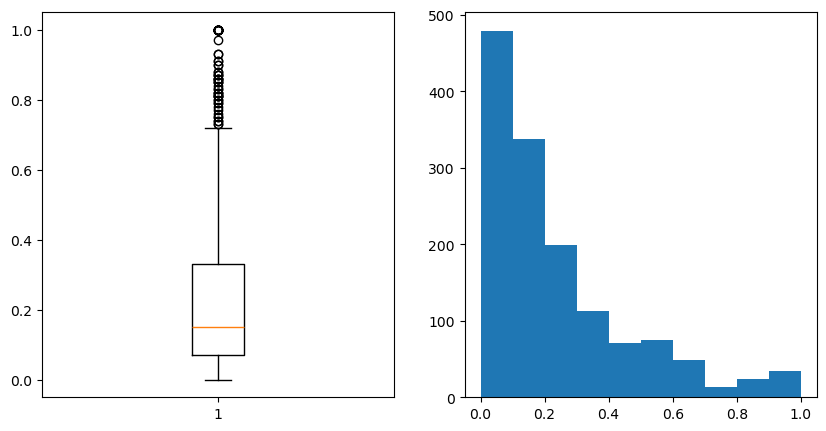

In [215]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
axes[0].boxplot(df_train.ViolentCrimesPerPop)
ret = axes[1].hist(df_train.ViolentCrimesPerPop)

From the statistics and plots:
- Target variable ViolentCrimesPerPop index ranges from 0 to 1, with an average of 0.234, a standard deviation of 0.228 and a median of 0.15.
- The box plot is another form presenting the statistics, showing that a majority of data has the value lower than 0.15. There are data points outside of whiskers of the box, could be considered as outliers, showing the anomaly in the distribution.
- The histogram further explains the anomaly in the distribution. Most of the data points lie in range of 0 and 0.1, while as the value increases from 0 to 1, the frequency of data points decreases sharply. However, there is a slight increase of the frequency from 0.7 to 1.0, showing the severe problems occurring in the society.

#### Correlation Matrix of the dataset
Now we analyze features with high correlation to the target variable

In [225]:
import numpy as np
correlations = df_train.corr()
correlations_numpy = correlations.to_numpy()

Analyze the top-10 correlated features to the target

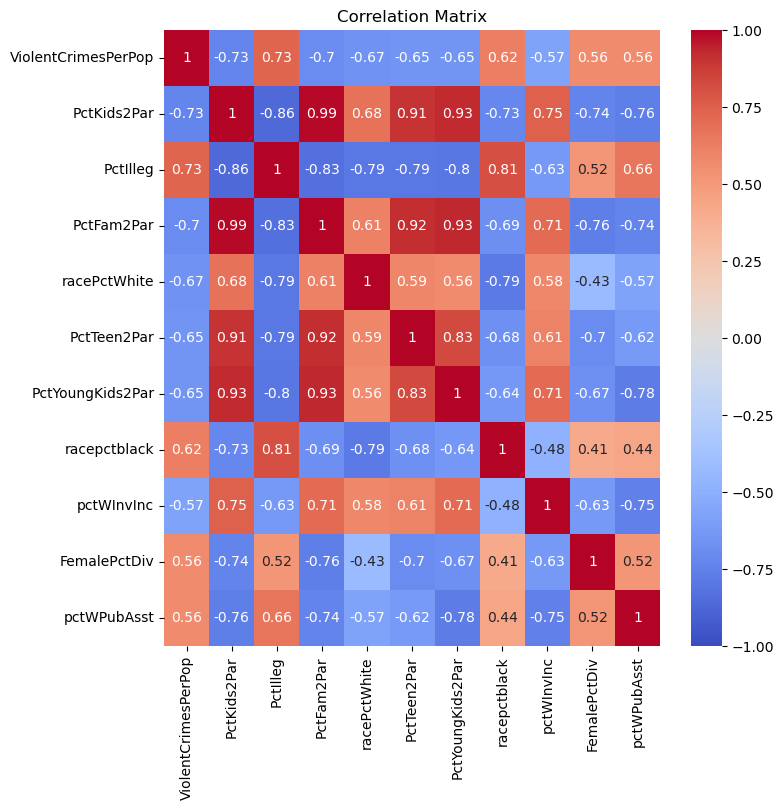

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# pick top-10 features correlated with target
idxs = np.argsort(np.abs(correlations_numpy[-1]))[::-1]
cols = np.array(df_train.columns)[idxs][:11]
df_temp = df_train.loc[:, cols]
corr_matrix = df_temp.corr()

# Draw the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [232]:
# output feature
print("Top-10 Related Feature")
col_names = ["Feature Name", "Corr", "Description"]
vals = [[col, correlations_numpy[-1][idx], feat2desc[col]] for col, idx in zip(cols, idxs[:11])]
df_temp = pd.DataFrame(vals, columns = col_names)
pd.set_option('display.max_colwidth', None)
df_temp.head(11)

Top-10 Related Feature


,Feature Name,Corr,Description
0,ViolentCrimesPerPop,1.000000,total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)
1,PctKids2Par,-0.733610,percentage of kids in family housing with two parents (numeric - decimal)
2,PctIlleg,0.731085,percentage of kids born to never married (numeric - decimal)
3,PctFam2Par,-0.700587,percentage of families (with kids) that are headed by two parents (numeric - decimal)
4,racePctWhite,-0.670000,percentage of population that is caucasian (numeric - decimal)
5,PctTeen2Par,-0.654296,percent of kids age 12-17 in two parent households (numeric - decimal)
6,PctYoungKids2Par,-0.653234,percent of kids 4 and under in two parent households (numeric - decimal)
7,racepctblack,0.617672,percentage of population that is african american (numeric - decimal)
8,pctWInvInc,-0.573853,percentage of households with investment / rent income in 1989 (numeric - decimal)
9,FemalePctDiv,0.564306,percentage of females who are divorced (numeric - decimal)


From the result, we can see the top-10 Feature related to our target (including target itself). 

Interestingly, features belonging family groups `PctKids2Par`, `PctIlleg`, `PctFam2Par`, `PctTeen2Par`, `PctYoungKids2Par`, `FemalePctDiv` are majority factors highly correlated with the violent crime rates. Percentage of kids with a complete two-parent family is negatively correlated with the target, while percentage of kids born without marriage is positively correlated with the target.

Apart from that, features concerning races `racePctWhite`, `racepctblack` also corrlate with the target, where lower violent crime rate usually comes with higher percentage of caucasian population or lower percentage of African American.

Last and not least, types of income supporting the household `pctWInvInc`, `pctWPubAsst` also have correlation with the target. These attributes might indicate the investment and economic environment of the community, thus indirectly reflecting the degree of social security.

#### Relation between Violent Crimes and Family Environment
We use scatter plot to visualize the relationship between our target and family environment factors

In [233]:
family_features = []
print("Family Environment Features")
for fam in family_groups:
    family_features.extend(fam)
    for x in fam:
        print(x, ":", feat2desc[x])

Family Environment Features
PctFam2Par : percentage of families (with kids) that are headed by two parents (numeric - decimal)
PctKids2Par : percentage of kids in family housing with two parents (numeric - decimal)
PctYoungKids2Par : percent of kids 4 and under in two parent households (numeric - decimal)
PctTeen2Par : percent of kids age 12-17 in two parent households (numeric - decimal)
PctWorkMomYoungKids : percentage of moms of kids 6 and under in labor force (numeric - decimal)
PctWorkMom : percentage of moms of kids under 18 in labor force (numeric - decimal)
MalePctDivorce : percentage of males who are divorced (numeric - decimal)
MalePctNevMarr : percentage of males who have never married (numeric - decimal)
FemalePctDiv : percentage of females who are divorced (numeric - decimal)
TotalPctDiv : percentage of population who are divorced (numeric - decimal)
NumIlleg : number of kids born to never married (numeric - decimal)
PctIlleg : percentage of kids born to never married (num

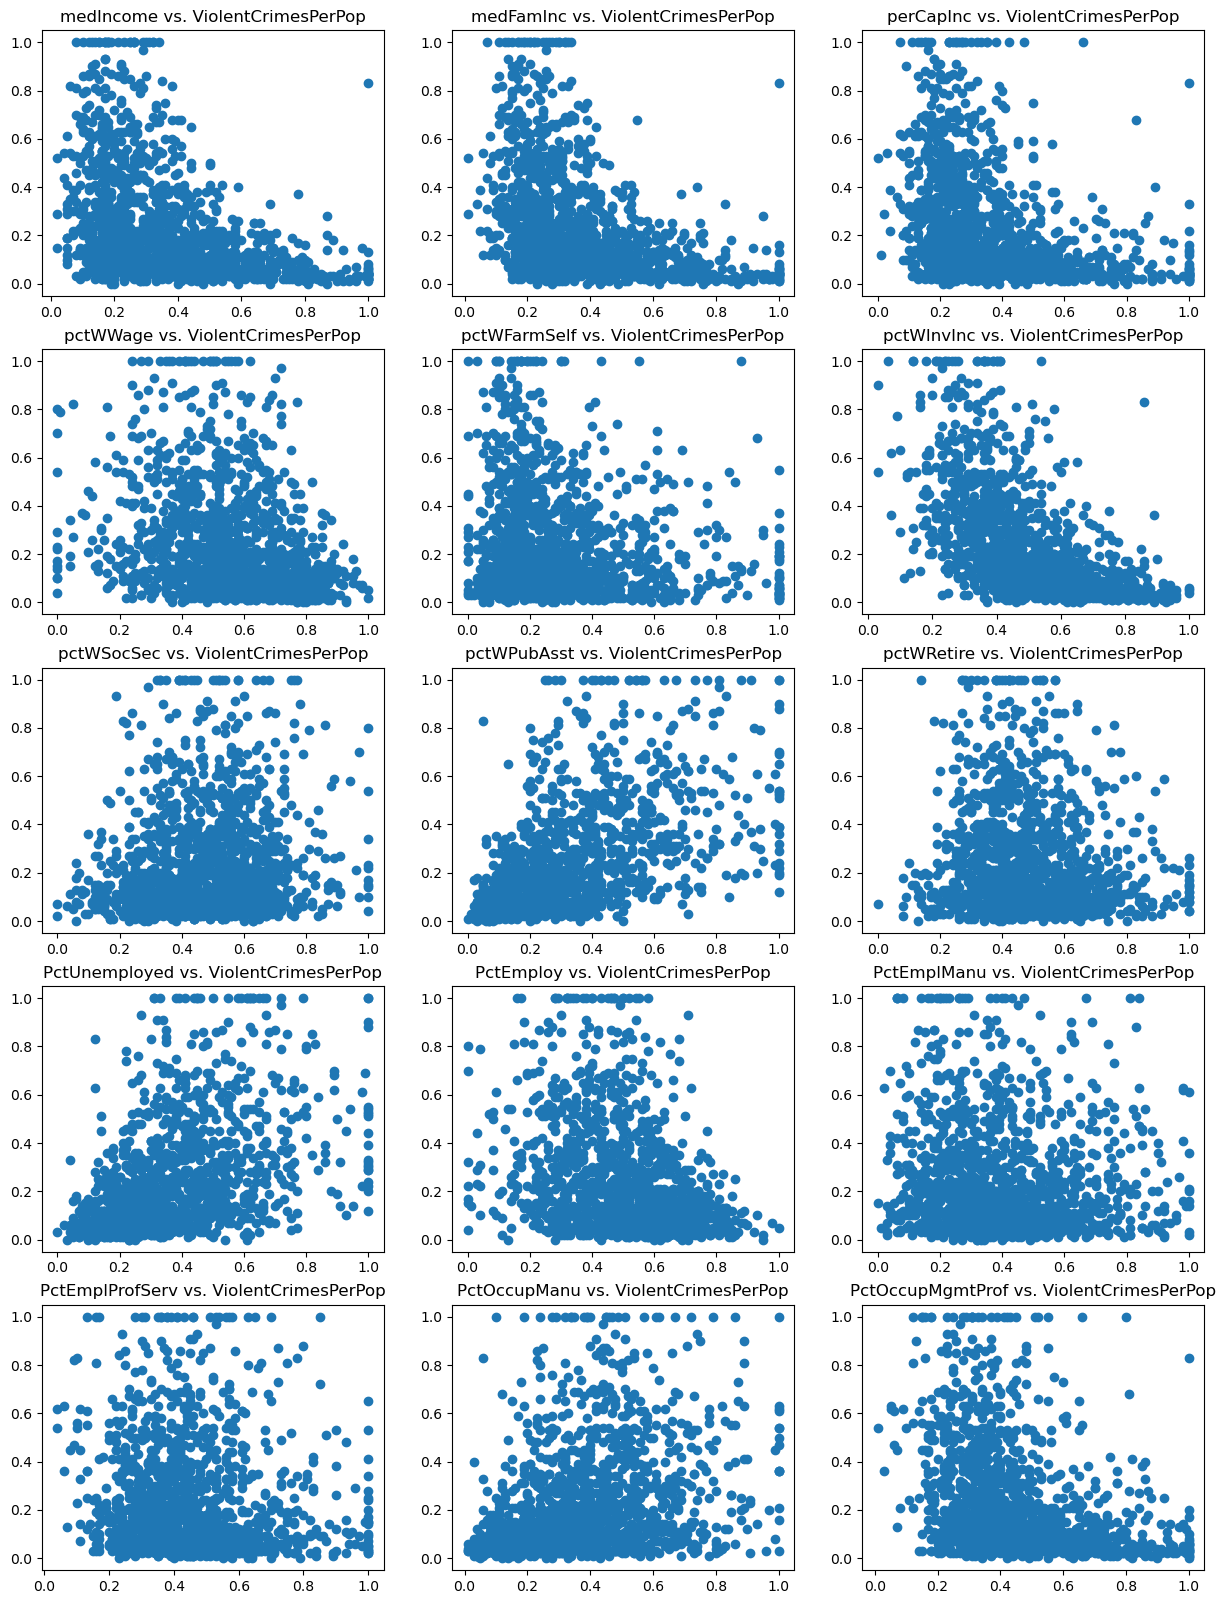

In [243]:
size = len(family_features)
ncols = 3
nrows = int(np.ceil(size / ncols))
fig, axes = plt.subplots(nrows, ncols)
fig.set_figwidth(5*ncols)
fig.set_figheight(4*nrows)
for i, f in enumerate(family_features):
    row = i // ncols
    col = i % ncols
    axes[row, col].scatter(df_train[f], df_train[target_group[0][0]])
    axes[row, col].set_title("{} vs. {}".format(f, target_group[0][0]))

From the plots, we can see that:
1. Communities with higher percentage of families with two parents generally have lower violent crime rates.
2. Communities with higher divorce rate generally showcase higher violent crime rates.
3. Percentage of Illegally births without marriage is positively related to violent crime rate.
4. Percentages of working mom and single men in the communities do not seem to be related to violent crime rate.
5. There are some non-linearities between features and target.

#### Relation between Violent Crimes and Police information
We use scatter plot to visualize the relationship between our target and police information factors, though these features will be removed during training

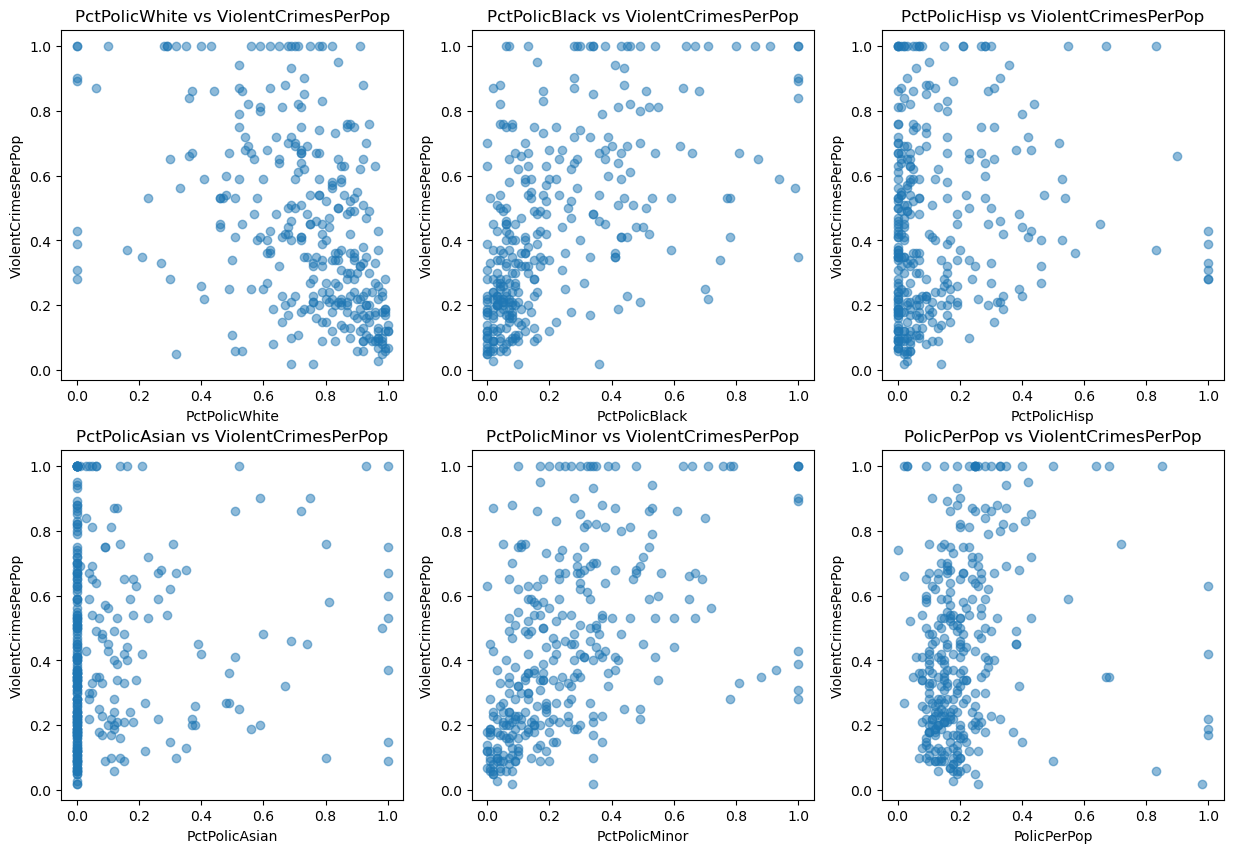

In [267]:
import matplotlib.pyplot as plt

target = target_group[0][0]  # Get the string 'ViolentCrimesPerPop'
x_cols = police_demographics_groups[1] + ['PolicPerPop'] # The 5 police demographic features
# transform value into float
df_backup = df_backup.dropna(axis=0)
for col in x_cols:
    df_backup[col] = df_backup[col].astype(float)

size = len(x_cols)
ncols = 3
nrows = int(np.ceil(size / ncols))

fig, axes = plt.subplots(nrows, ncols)
fig.set_figwidth(5*ncols)
fig.set_figheight(5*nrows)

for i, x_col in enumerate(x_cols):
    row = i // ncols
    col = i % ncols
    axes[row, col].scatter(df_backup[x_col], df_backup[target], alpha=0.5)
    axes[row, col].set_xlabel(x_col)
    axes[row, col].set_ylabel(target)
    axes[row, col].set_title(f'{x_col} vs {target}')

plt.show()



For visualization purposes, we removed all rows with missing or NA values. From the resulting plots, we can observe that there is no strong correlation between violent crime rates and the percentage of police officers by race, neither does the number of police officers per 100K population. There appears to be a slight negative correlation between the target and number of white officers, while weak correlations for all the other minority groups, which might be due to the lack of samples.

#### Relation between Violent Crime and Race Structure
In this part, we use a normalized bar plot combined with a line plot to demonstrate the variation of the race structure corresponding to different violent crime rates in communities.

During visualization, we found that the sum of percentages of all races in a community might be higher than 1, which could be due to multiple countings of one identity with mixed blood. For the ease of visualization, we temporarily normalized percentages of different races within each community.

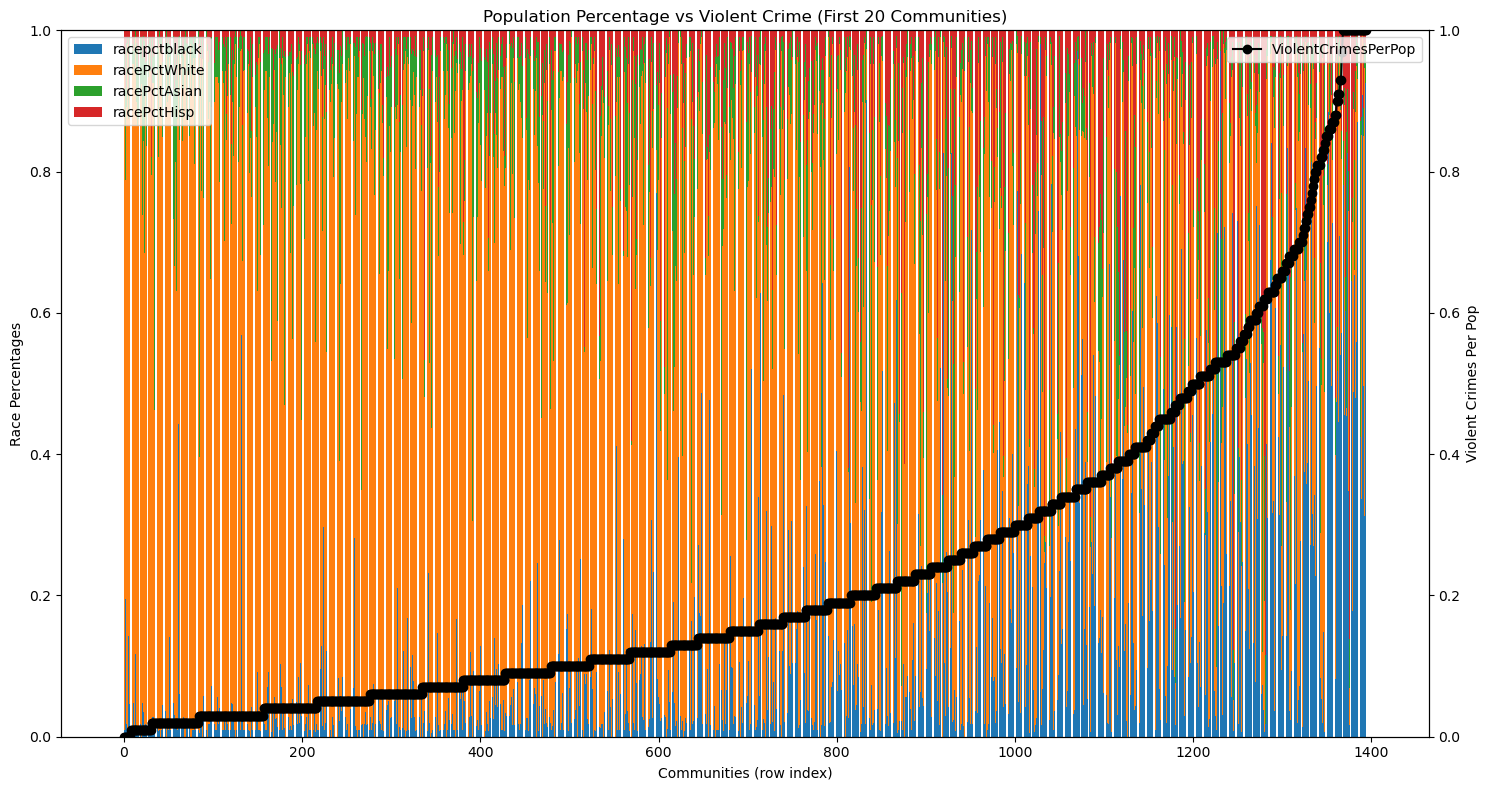

In [278]:
target = target_group[0]
x_cols = race_ethnicity_groups[0]

df_plot = df_train[x_cols + target]
x = range(len(df_plot))

sums = df_train[x_cols].sum(axis=1)
df_n = df_train[x_cols].div(sums, axis=0)

df_n[target[0]] = df_train[target].values
df_plot = df_n

df_plot = df_plot.sort_values(by=target[0])

fig, ax1 = plt.subplots(figsize=(15, 8))

bottom = [0] * len(df_plot)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, col in enumerate(x_cols):
    ax1.bar(x, df_plot[col], bottom=bottom, label=col, color=colors[i])
    bottom = [b + v for b, v in zip(bottom, df_plot[col])]

ax1.set_ylabel("Race Percentages")
ax1.set_xlabel("Communities (row index)")
ax1.set_ylim(0, 1)
ax1.legend(loc='upper left')

# Line plot (on same x-axis)
ax2 = ax1.twinx()
ax2.plot(x, df_plot[target[0]], color='black', marker='o', label=target[0])
ax2.set_ylabel("Violent Crimes Per Pop")
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.title("Population Percentage vs Violent Crime (First 20 Communities)")
plt.tight_layout()
plt.show()

Apart from the overall view, we draw the plot for each race respectively.

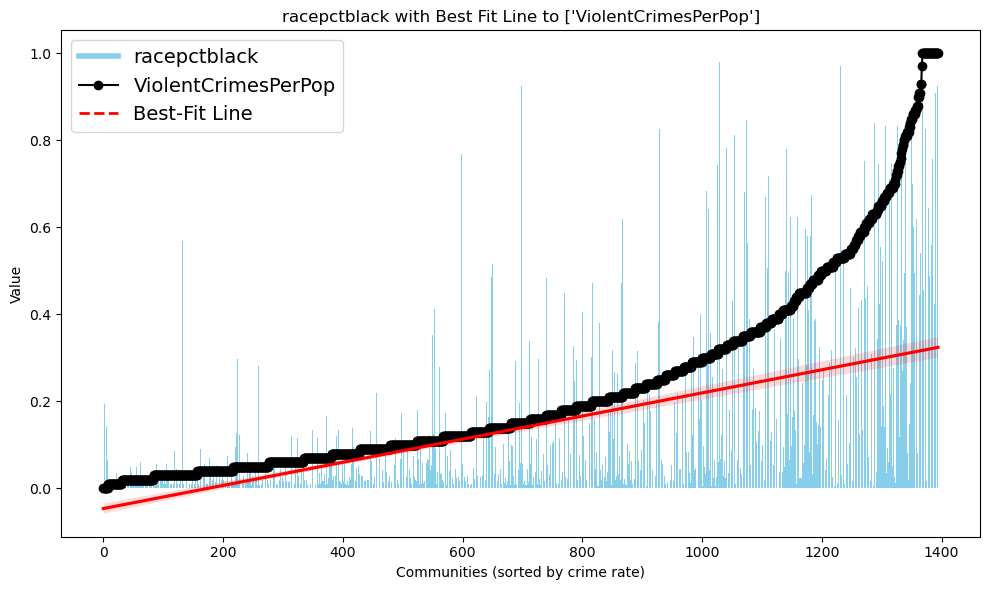

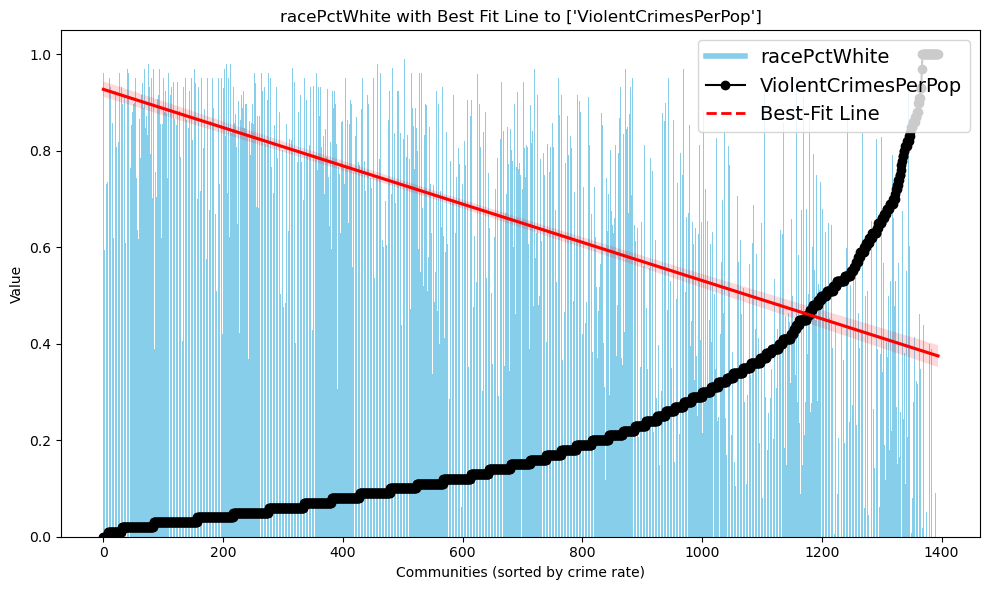

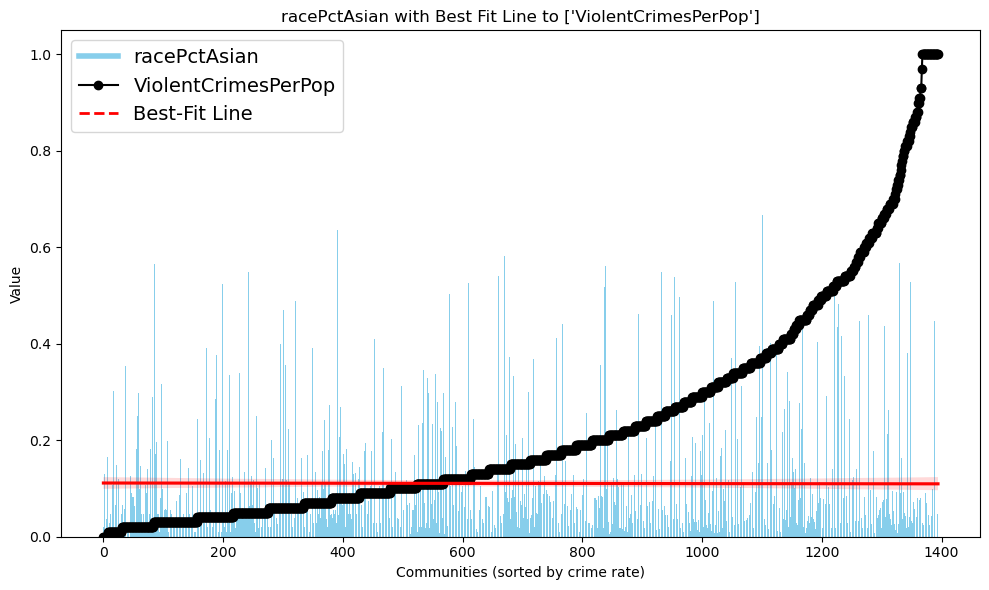

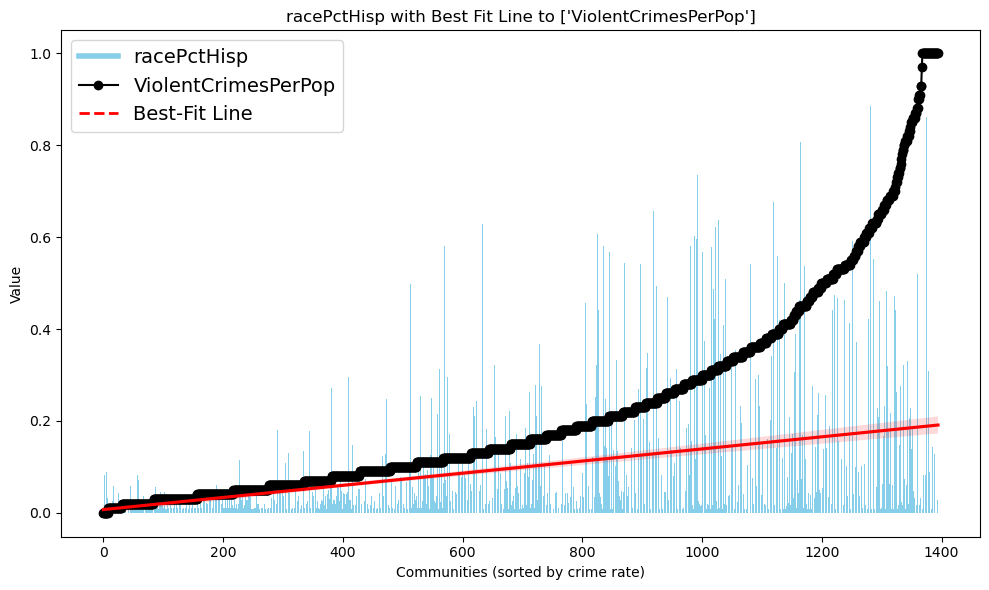

In [279]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D
import seaborn as sns

x_indices = np.arange(len(df_plot))
# Plot each race column separately
for col in x_cols:
    plt.figure(figsize=(10, 6))
    
    # Bar for race percentage
    plt.bar(x, df_plot[col], color='skyblue', label=col)
    
    # Line for violent crime
    plt.plot(x, df_plot[target[0]], color='black', marker='o', label=target[0])

    sns.regplot(
        x=x_indices,
        y=df_plot[col],
        scatter=False,
        line_kws={'color': 'red', 'label': 'Best-Fit Line'},
    )

    custom_lines = [
        Line2D([0], [0], color='skyblue', lw=4, label=col),
        Line2D([0], [0], color='black', marker='o', label=target[0]),
        Line2D([0], [0], color='red', linestyle='--', lw=2, label='Best-Fit Line')
    ]
    plt.legend(handles=custom_lines, fontsize=14)

    plt.xlabel("Communities (sorted by crime rate)")
    plt.ylabel("Value")
    plt.title(f"{col} with Best Fit Line to {target}")
    plt.tight_layout()
    plt.show()


For the graphs above, we first plotted all features together for better visualization, and then separately to add regression lines in order to identify positive or negative correlations.
From the results, we can observe that there is little correlation between the percentage of populations by race and the violent crime rate. As violent crime increases:
- The regression line for Asian population remains almost flat
- The regression line for Hispanic population increases slightly
- The regression line for White population shows a slight decrease
- The regression line for Black population shows a slight increase


#### Relation between Violent Crime and Income and Economic Factors


In [285]:
print("Feature | Description")
for cols in income_economic_groups:
    for col in cols:
        print(col, "|", feat2desc[col])

Feature | Description
medIncome | median household income (numeric - decimal)
medFamInc | median family income (differs from household income for non-family households) (numeric - decimal)
perCapInc | per capita income (numeric - decimal)
pctWWage | percentage of households with wage or salary income in 1989 (numeric - decimal)
pctWFarmSelf | percentage of households with farm or self employment income in 1989 (numeric - decimal)
pctWInvInc | percentage of households with investment / rent income in 1989 (numeric - decimal)
pctWSocSec | percentage of households with social security income in 1989 (numeric - decimal)
pctWPubAsst | percentage of households with public assistance income in 1989 (numeric - decimal)
pctWRetire | percentage of households with retirement income in 1989 (numeric - decimal)
PctUnemployed | percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)
PctEmploy | percentage of people 16 and over who are employed (numeric - decimal)
Pct

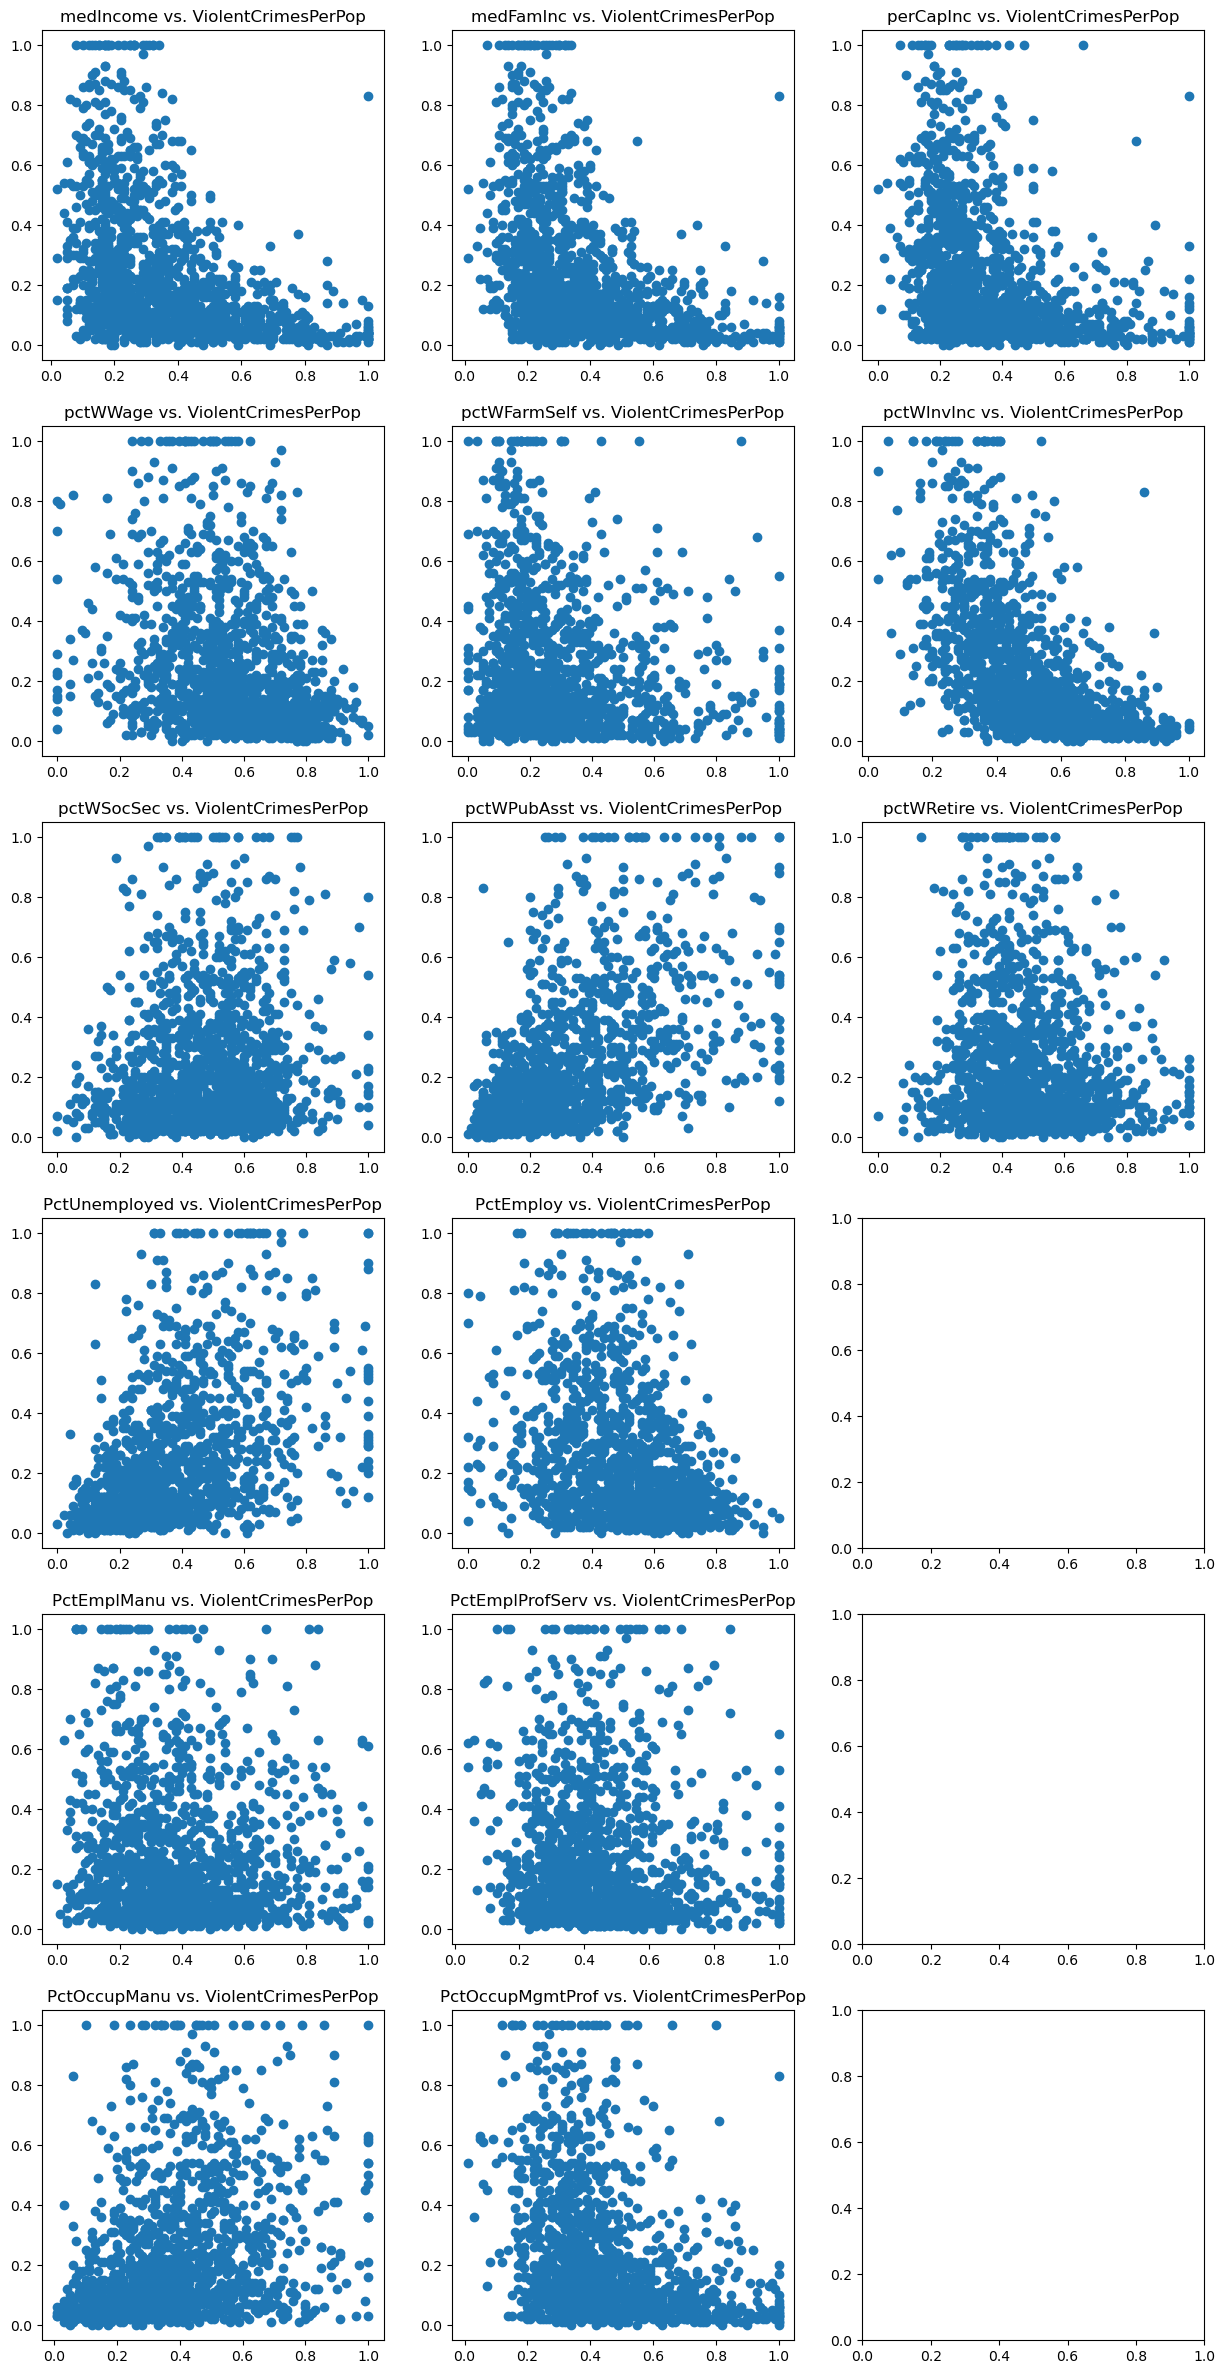

In [283]:
nrows = len(income_economic_groups)
ncols = max([len(x) for x in income_economic_groups])
fig, axes = plt.subplots(nrows, ncols)
fig.set_figheight(5*nrows)
fig.set_figwidth(5*ncols)

for i, cols in enumerate(income_economic_groups):
    for j, col in enumerate(cols):
        ax = axes[i, j]
        ax.scatter(df_train[col], df_train[target_group[0][0]])
        ax.set_title("{} vs. {}".format(col, target_group[0][0]))

From the plots, we can see that:
1. Family income is negatively related with violent crime rate in a community. If a community has a higher median or average income, the violent crime rate index is more possible to be low.
2. The structure of the types of income supporting households is related to violent crime rate in a community. The percentages of households with farm or self-employment, social security income, or wage and salary income do not show a significant correlation with the violent crime rate, while investment or rent income and public assistance income show a clear correlation with the violent crime rate. This could be explained by the economic environment in the community: When people living in the community are getting wealthier, there would be a higher chance for households with investment or rent income to go up, and at the same time violent crime rate goes down because of the wellness of overall economic stability. On the contrary, when people living in the community get poorer or even go bankrupt, there will be more people living with the support of public assistance, and violent crime rate goes up because people are not happy living in the community.
3. Employment rate, another index reflecting the overall economic environment, also shows some correlation with the violent crime rate. Interestingly, when the employment rate is lower than 0.8, it seems that there is no linear relationship between it and the target, but when it is higher than 80%, there suddenly are no communities with the violent crime rate index over 0.3. This indicates the non-linearity in this data.
4. Most types of occupation seem to have no obvious relationships with violent crime rate index, but the percentage of management and professional occupations is slightly negatively correlated with the target. It could be because of their average income and eduational level.

### Target Variable
split the target from the data frame

In [340]:
y_train = df_train.pop(target_group[0][0])
y_test = df_test.pop(target_group[0][0])
X_train = df_train
X_test = df_test

## Model Training

#### Linear Regression

In [351]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, lasso, Lasso

lr = LinearRegression()

# Train the model on full training set
lr.fit(X_train, y_train)

# Test on training set and test set
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

train_nmse = np.sqrt(mean_squared_error(y_train, y_pred_tr))
test_nmse = np.sqrt(mean_squared_error(y_test, y_pred_te))
train_r2 = r2_score(y_train, y_pred_tr)
test_r2 = r2_score(y_test, y_pred_te)

# Output
print("Linear Regression with Cross-Validation")
print("Root Mean Squared Error:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_nmse, 
    test_nmse))
print("R-square:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_r2,
    test_r2
))

Linear Regression with Cross-Validation
Root Mean Squared Error:
train set:0.1250
test set:0.1414
R-square:
train set:0.6983
test set:0.6670


#### Lasso Regression

In [368]:
from sklearn.model_selection import GridSearchCV

# cross validation to find the best parameter
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# fit the model on full training set
lasso = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

# Test on training set and test set
y_pred_tr = lasso.predict(X_train)
y_pred_te = lasso.predict(X_test)

train_nmse = np.sqrt(mean_squared_error(y_train, y_pred_tr))
test_nmse = np.sqrt(mean_squared_error(y_test, y_pred_te))
train_r2 = r2_score(y_train, y_pred_tr)
test_r2 = r2_score(y_test, y_pred_te)
print("Lasso Regression")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Root Mean Squared Error:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_nmse, 
    test_nmse))
print("R-square:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_r2,
    test_r2
))


Lasso Regression
Best alpha: 0.0001
Root Mean Squared Error:
train set:0.1270
test set:0.1413
R-square:
train set:0.6885
test set:0.6677


In [372]:
print("Selected features:", len([x for x in lasso.coef_ if x != 0]))
for i, coef in enumerate(lasso.coef_):
    if coef != 0:
        print(X_train.columns[i])

Selected features: 65
racepctblack
racePctAsian
agePct12t29
agePct65up
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctUnemployed
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
PctKids2Par
PctYoungKids2Par
PctWorkMomYoungKids
PctWorkMom
PctIlleg
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecImmig8
PctLargHouseFam
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
OwnOccLowQuart
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumStreet
PctForeignBorn
PctBornSameState
PctSameCity85
PctSameState85
LandArea
PopDens
PctUsePubTrans
LemasPctOfficDrugUn


From the feature selection result, we notice that there are 65 out of 100 features contributing to the target, they could be categorized to race structure, age structure, urbanization, economic and accommodation structure, immigration, population density, transportation.

#### Random Forest

In [379]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# define the model
rf = RandomForestRegressor()

# grid search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 20, 50, 100],
    'min_samples_split': [5, 10, 20]
}

# k fold cross validation
kf = KFold(n_splits=5, shuffle=True)

# create grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit data
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_

In [380]:
# estimate the model on train dataset
y_pred = best_model.predict(X_train)

# calculate NMSE
mse = mean_squared_error(y_train, y_pred)
train_nmse = np.sqrt(mse)
train_r2 = r2_score(y_train, y_pred)

# estimate the model on test dataset
y_pred = best_model.predict(X_test)

# calculate NMSE
mse = mean_squared_error(y_test, y_pred)
test_nmse = np.sqrt(mse)
test_r2 = r2_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Root Mean Squared Error:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_nmse, 
    test_nmse))
print("R-square:\ntrain set:{:.4f}\ntest set:{:.4f}".format(
    train_r2,
    test_r2
))

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Root Mean Squared Error:
train set:0.0686
test set:0.1444
R-square:
train set:0.9091
test set:0.6528


Here is a table comparing 3 models:

| Model             | Hyper Parameters                                      | Train RMSE | Test RMSE | Train R2 | Test R2 |
| ----------------- | ----------------------------------------------------- | ---------- | --------- | -------- | ------- |
| Linear Regression | -                                                     | 0.1250     | 0.1414    | 0.6983   | 0.6670  |
| Ridge Regression  | alpha: 10                                             | 0.1299     | 0.1426    | 0.6739   | 0.6613  |
| Random Forest     | max_depth: 20, min_samples_split: 10,  n_estimator:50 | 0.0686     | 0.1444    | 0.9091   | 0.6528  |

As we can see, the best model is Linear Regression model. Random forest model exhibits an overfitting on the training set, and its result on test set is worse than other models.

### Feature Importance Analysis with Permutation Importance

In [184]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0387 ± 0.0077,PctKids2Par
0.0277 ± 0.0044,PctIlleg
0.0273 ± 0.0051,racePctWhite
0.0246 ± 0.0065,PctFam2Par
0.0211 ± 0.0064,racepctblack
0.0168 ± 0.0032,NumIlleg
0.0104 ± 0.0035,PctYoungKids2Par
0.0091 ± 0.0019,pctWInvInc
0.0075 ± 0.0029,PctTeen2Par
0.0068 ± 0.0056,PctPopUnderPov


The feature importance result generally aligns with what we have known from our exploratory data analysis, where family (`PctKids2Par`, `PctIlleg`, `PctFam2Par`), race (`racePctWhite`, `racepctblack`) and economic (`pctWInvInc`, `PctPopUnderPov`) aspects are the features with the highest feature importances, showing that they are contributing to the variance in the violent crime rate in communities.

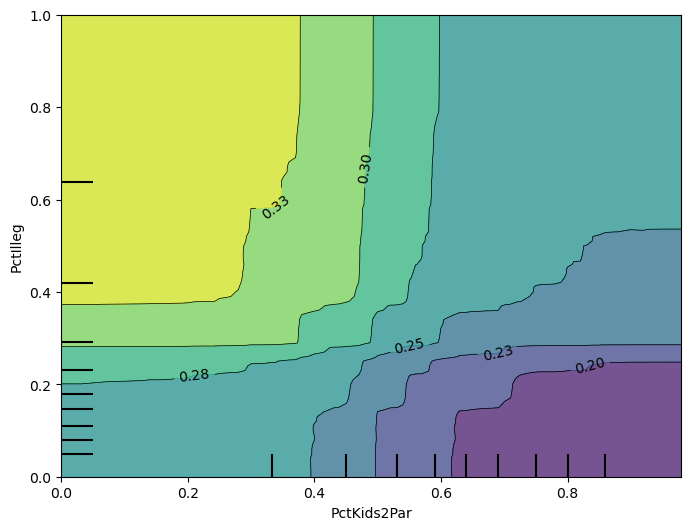

In [191]:
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
fig, ax = plt.subplots(figsize=(8, 6))
disp1 = PartialDependenceDisplay.from_estimator(best_model, X_test, [('PctKids2Par', 'PctIlleg')], ax=ax)
plt.show()

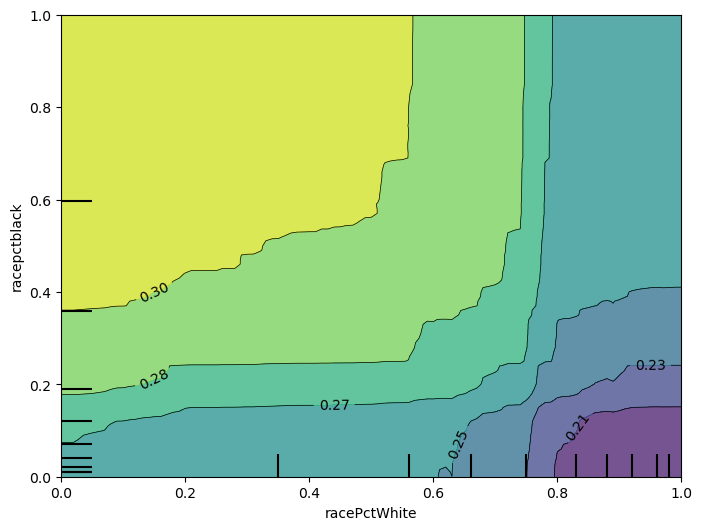

In [192]:
fig, ax = plt.subplots(figsize=(8, 6))
disp1 = PartialDependenceDisplay.from_estimator(best_model, X_test, [('racePctWhite', 'racepctblack')], ax=ax)
plt.show()


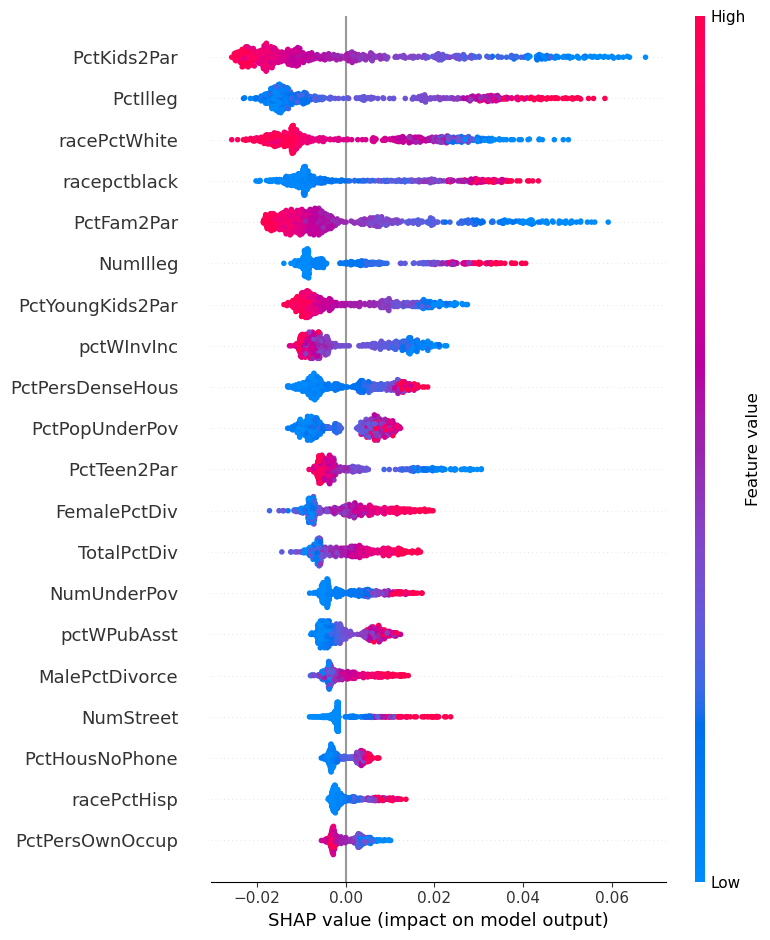

In [199]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

## Summary

The project focused on analyzing the "Communities and Crime" dataset to predict violent crime cases per 100K population in U.S. communities. 

Through data preprocessing, cleaning, and exploration, key factors related to violent crime were identified. Family - related
factors such as the percentage of kids in two - parent families and illegitimate birth rates,
along with race and income - related features, showed significant correlations with violent
crime. 

Machine learning models, including Linear Regression, Lasso Regression, and
Random Forest, were implemented, and the feature explanation methods deepened the
understanding of relations between these correlations. Overall, family structure, race
composition, and economic factors are crucial determinants of violent crime rates. 

Future
research could not only explore more complex models and additional data sources to
enhance prediction accuracy, but also explore the relationships between all features to gain
deeper insights into crime prevention strategies.